In [50]:
#import libaries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [51]:
dataset = pd.read_csv("student/student-mat.csv", sep=';', encoding='utf8')
dataset.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [52]:
#list(dataset.columns)

In [53]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
school        395 non-null object
sex           395 non-null object
age           395 non-null int64
address       395 non-null object
famsize       395 non-null object
Pstatus       395 non-null object
Medu          395 non-null int64
Fedu          395 non-null int64
Mjob          395 non-null object
Fjob          395 non-null object
reason        395 non-null object
guardian      395 non-null object
traveltime    395 non-null int64
studytime     395 non-null int64
failures      395 non-null int64
schoolsup     395 non-null object
famsup        395 non-null object
paid          395 non-null object
activities    395 non-null object
nursery       395 non-null object
higher        395 non-null object
internet      395 non-null object
romantic      395 non-null object
famrel        395 non-null int64
freetime      395 non-null int64
goout         395 non-null int64
Dalc          395 no

In [54]:
dataset.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


In [55]:
#check missing values
dataset.isna().sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

In [56]:
#categrorical columns
cat_features=[i for i in dataset.columns if dataset.dtypes[i]=='object']
cat_features

['school',
 'sex',
 'address',
 'famsize',
 'Pstatus',
 'Mjob',
 'Fjob',
 'reason',
 'guardian',
 'schoolsup',
 'famsup',
 'paid',
 'activities',
 'nursery',
 'higher',
 'internet',
 'romantic']

In [57]:
#numeric features
num_features = [i for  i in dataset.columns if dataset.dtypes[i]=='int64']
num_features

['age',
 'Medu',
 'Fedu',
 'traveltime',
 'studytime',
 'failures',
 'famrel',
 'freetime',
 'goout',
 'Dalc',
 'Walc',
 'health',
 'absences',
 'G1',
 'G2',
 'G3']

In [58]:
# one hot encode the covariate 'school'
one_hot_school = pd.get_dummies(dataset['school'], prefix='school')

# use pd.concat to join the new columns with your original dataframe
dataset = pd.concat([dataset, one_hot_school], axis=1)

# now drop the original 'country' column (you don't need it anymore)
dataset.drop(['school'], axis=1, inplace=True)

# one hot encode the covariate 'sex'
one_hot_sex = pd.get_dummies(dataset['sex'], prefix='sex')

# use pd.concat to join the new columns with your original dataframe
dataset = pd.concat([dataset, one_hot_sex], axis=1)

# now drop the original 'country' column (you don't need it anymore)
dataset.drop(['sex'], axis=1, inplace=True)

# one hot encode the covariate 'address'
one_hot_address = pd.get_dummies(dataset['address'], prefix='address')

# use pd.concat to join the new columns with your original dataframe
dataset = pd.concat([dataset, one_hot_address], axis=1)

# now drop the original 'country' column (you don't need it anymore)
dataset.drop(['address'], axis=1, inplace=True)


# one hot encode the covariate 'famsize'
one_hot_famsize = pd.get_dummies(dataset['famsize'], prefix='famsize')

# use pd.concat to join the new columns with your original dataframe
dataset = pd.concat([dataset, one_hot_famsize], axis=1)

# now drop the original 'country' column (you don't need it anymore)
dataset.drop(['famsize'], axis=1, inplace=True)

# one hot encode the covariate 'Pstatus'
one_hot_Pstatus = pd.get_dummies(dataset['Pstatus'], prefix='Pstatus')

# use pd.concat to join the new columns with your original dataframe
dataset = pd.concat([dataset, one_hot_Pstatus], axis=1)

# now drop the original 'country' column (you don't need it anymore)
dataset.drop(['Pstatus'], axis=1, inplace=True)

# one hot encode the covariate 'Mjob'
one_hot_Mjob = pd.get_dummies(dataset['Mjob'], prefix='Mjob')

# use pd.concat to join the new columns with your original dataframe
dataset = pd.concat([dataset, one_hot_Mjob], axis=1)

# now drop the original 'country' column (you don't need it anymore)
dataset.drop(['Mjob'], axis=1, inplace=True)

# one hot encode the covariate 'Fjob'
one_hot_Fjob = pd.get_dummies(dataset['Fjob'], prefix='Fjob')

# use pd.concat to join the new columns with your original dataframe
dataset = pd.concat([dataset, one_hot_Fjob], axis=1)

# now drop the original 'country' column (you don't need it anymore)
dataset.drop(['Fjob'], axis=1, inplace=True)

# one hot encode the covariate 'reason'
one_hot_reason = pd.get_dummies(dataset['reason'], prefix='reason')

# use pd.concat to join the new columns with your original dataframe
dataset = pd.concat([dataset, one_hot_reason], axis=1)

# now drop the original 'country' column (you don't need it anymore)
dataset.drop(['reason'], axis=1, inplace=True)

# one hot encode the covariate 'guardian'
one_hot_guardian = pd.get_dummies(dataset['guardian'], prefix='guardian')

# use pd.concat to join the new columns with your original dataframe
dataset = pd.concat([dataset, one_hot_guardian], axis=1)

# now drop the original 'country' column (you don't need it anymore)
dataset.drop(['guardian'], axis=1, inplace=True)

# one hot encode the covariate 'schoolsup'
one_hot_schoolsup = pd.get_dummies(dataset['schoolsup'], prefix='schoolsup')

# use pd.concat to join the new columns with your original dataframe
dataset = pd.concat([dataset, one_hot_schoolsup], axis=1)

# now drop the original 'country' column (you don't need it anymore)
dataset.drop(['schoolsup'], axis=1, inplace=True)

# one hot encode the covariate 'famsup'
one_hot_famsup = pd.get_dummies(dataset['famsup'], prefix='famsup')

# use pd.concat to join the new columns with your original dataframe
dataset = pd.concat([dataset, one_hot_famsup], axis=1)

# now drop the original 'country' column (you don't need it anymore)
dataset.drop(['famsup'], axis=1, inplace=True)

# one hot encode the covariate 'paid'
one_hot_paid = pd.get_dummies(dataset['paid'], prefix='paid')

# use pd.concat to join the new columns with your original dataframe
dataset = pd.concat([dataset, one_hot_paid], axis=1)

# now drop the original 'country' column (you don't need it anymore)
dataset.drop(['paid'], axis=1, inplace=True)

# one hot encode the covariate 'activities'
one_hot_activities = pd.get_dummies(dataset['activities'], prefix='activities')

# use pd.concat to join the new columns with your original dataframe
dataset = pd.concat([dataset, one_hot_activities], axis=1)

# now drop the original 'country' column (you don't need it anymore)
dataset.drop(['activities'], axis=1, inplace=True)

# one hot encode the covariate 'nursery'
one_hot_nursery = pd.get_dummies(dataset['nursery'], prefix='nursery')

# use pd.concat to join the new columns with your original dataframe
dataset = pd.concat([dataset, one_hot_nursery], axis=1)

# now drop the original 'country' column (you don't need it anymore)
dataset.drop(['nursery'], axis=1, inplace=True)

# one hot encode the covariate 'higher'
one_hot_higher = pd.get_dummies(dataset['higher'], prefix='higher')

# use pd.concat to join the new columns with your original dataframe
dataset = pd.concat([dataset, one_hot_higher], axis=1)

# now drop the original 'country' column (you don't need it anymore)
dataset.drop(['higher'], axis=1, inplace=True)

# one hot encode the covariate 'internet'
one_hot_internet = pd.get_dummies(dataset['internet'], prefix='internet')

# use pd.concat to join the new columns with your original dataframe
dataset = pd.concat([dataset, one_hot_internet], axis=1)

# now drop the original 'country' column (you don't need it anymore)
dataset.drop(['internet'], axis=1, inplace=True)

# one hot encode the covariate 'romantic'
one_hot_romantic = pd.get_dummies(dataset['romantic'], prefix='romantic')

# use pd.concat to join the new columns with your original dataframe
dataset = pd.concat([dataset, one_hot_romantic], axis=1)

# now drop the original 'romantic' column (you don't need it anymore)
dataset.drop(['romantic'], axis=1, inplace=True)

# print the resultant dataframe
dataset.head(1)

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,...,activities_no,activities_yes,nursery_no,nursery_yes,higher_no,higher_yes,internet_no,internet_yes,romantic_no,romantic_yes
0,18,4,4,2,2,0,4,3,4,1,...,1,0,0,1,0,1,1,0,1,0


In [59]:
#'school','sex','address','famsize','Pstatus','Mjob','Fjob','reason','guardian','schoolsup','famsup',
 #'paid','activities','nurhigher','internet','romantic

In [60]:
dataset.columns

Index(['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel',
       'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2',
       'G3', 'school_GP', 'school_MS', 'sex_F', 'sex_M', 'address_R',
       'address_U', 'famsize_GT3', 'famsize_LE3', 'Pstatus_A', 'Pstatus_T',
       'Mjob_at_home', 'Mjob_health', 'Mjob_other', 'Mjob_services',
       'Mjob_teacher', 'Fjob_at_home', 'Fjob_health', 'Fjob_other',
       'Fjob_services', 'Fjob_teacher', 'reason_course', 'reason_home',
       'reason_other', 'reason_reputation', 'guardian_father',
       'guardian_mother', 'guardian_other', 'schoolsup_no', 'schoolsup_yes',
       'famsup_no', 'famsup_yes', 'paid_no', 'paid_yes', 'activities_no',
       'activities_yes', 'nursery_no', 'nursery_yes', 'higher_no',
       'higher_yes', 'internet_no', 'internet_yes', 'romantic_no',
       'romantic_yes'],
      dtype='object')

In [61]:
dataset = dataset[['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel',
 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'school_GP', 
 'school_MS', 'sex_F', 'sex_M', 'address_R','address_U', 'famsize_GT3', 
 'famsize_LE3', 'Pstatus_A', 'Pstatus_T','Mjob_at_home', 'Mjob_health', 
 'Mjob_other', 'Mjob_services','Mjob_teacher', 'Fjob_at_home', 'Fjob_health', 
 'Fjob_other','Fjob_services', 'Fjob_teacher', 'reason_course', 'reason_home',
 'reason_other', 'reason_reputation', 'guardian_father','guardian_mother', 
 'guardian_other', 'schoolsup_no', 'schoolsup_yes','famsup_no', 'famsup_yes', 
 'paid_no', 'paid_yes', 'activities_no','activities_yes', 'nursery_no', 'nursery_yes', 
 'higher_no','higher_yes', 'internet_no', 'internet_yes', 'romantic_no','romantic_yes',
 'G1', 'G2','G3']]
dataset.head(1)

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,...,nursery_yes,higher_no,higher_yes,internet_no,internet_yes,romantic_no,romantic_yes,G1,G2,G3
0,18,4,4,2,2,0,4,3,4,1,...,1,0,1,1,0,1,0,5,6,6


In [62]:
# get the target and features

In [63]:
X=dataset.iloc[:,:-1]
X.head(3)

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,...,nursery_no,nursery_yes,higher_no,higher_yes,internet_no,internet_yes,romantic_no,romantic_yes,G1,G2
0,18,4,4,2,2,0,4,3,4,1,...,0,1,0,1,1,0,1,0,5,6
1,17,1,1,1,2,0,5,3,3,1,...,1,0,0,1,0,1,1,0,5,5
2,15,1,1,1,2,3,4,3,2,2,...,0,1,0,1,0,1,1,0,7,8


In [64]:
y = dataset.iloc[:,-1]
y.head(3)

0     6
1     6
2    10
Name: G3, dtype: int64

In [65]:
# # drop G1 and G2 colum
# X.drop(["G1", "G2"], axis = 1, inplace = True)
# X.head(3)

In [66]:
X.columns

Index(['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel',
       'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'school_GP',
       'school_MS', 'sex_F', 'sex_M', 'address_R', 'address_U', 'famsize_GT3',
       'famsize_LE3', 'Pstatus_A', 'Pstatus_T', 'Mjob_at_home', 'Mjob_health',
       'Mjob_other', 'Mjob_services', 'Mjob_teacher', 'Fjob_at_home',
       'Fjob_health', 'Fjob_other', 'Fjob_services', 'Fjob_teacher',
       'reason_course', 'reason_home', 'reason_other', 'reason_reputation',
       'guardian_father', 'guardian_mother', 'guardian_other', 'schoolsup_no',
       'schoolsup_yes', 'famsup_no', 'famsup_yes', 'paid_no', 'paid_yes',
       'activities_no', 'activities_yes', 'nursery_no', 'nursery_yes',
       'higher_no', 'higher_yes', 'internet_no', 'internet_yes', 'romantic_no',
       'romantic_yes', 'G1', 'G2'],
      dtype='object')

In [67]:
### Feature Importance
from sklearn.ensemble import ExtraTreesRegressor
import matplotlib.pyplot as plt
model = ExtraTreesRegressor()
model.fit(X,y)

ExtraTreesRegressor(bootstrap=False, criterion='mse', max_depth=None,
          max_features='auto', max_leaf_nodes=None,
          min_impurity_decrease=0.0, min_impurity_split=None,
          min_samples_leaf=1, min_samples_split=2,
          min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
          oob_score=False, random_state=None, verbose=0, warm_start=False)

In [68]:
print(model.feature_importances_)

[6.55067923e-03 2.48995726e-03 2.07018868e-03 8.04897183e-03
 8.61364939e-03 1.84785689e-02 8.59763559e-03 2.52876074e-03
 6.58533630e-03 2.64855685e-03 2.99132301e-03 7.68755141e-03
 3.42952640e-02 2.06658580e-04 2.41125011e-03 1.77850928e-03
 1.58098329e-03 4.56703689e-04 2.25940924e-03 1.47630047e-03
 4.72489039e-04 9.65819623e-04 4.99755892e-04 4.10585204e-03
 1.58832603e-03 3.05121182e-03 5.52085820e-03 3.11965522e-04
 1.41279951e-03 7.19973177e-05 4.56751280e-03 6.66938972e-03
 1.50273641e-03 2.52697932e-03 5.79397612e-03 5.89083108e-04
 2.32234335e-03 1.16894176e-03 4.59597041e-03 3.27863712e-03
 3.12188233e-04 7.62429868e-04 5.15926599e-04 1.41671403e-03
 1.10672019e-03 1.15097297e-03 2.94642174e-03 1.00122502e-03
 1.50205222e-03 1.86057497e-03 1.55290292e-03 1.63913008e-03
 1.18063235e-03 4.98902309e-04 3.26787897e-03 2.40219941e-03
 2.45091314e-01 5.59018911e-01]


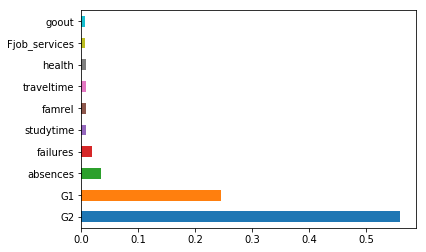

In [69]:
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

In [70]:
(X.columns)

Index(['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel',
       'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'school_GP',
       'school_MS', 'sex_F', 'sex_M', 'address_R', 'address_U', 'famsize_GT3',
       'famsize_LE3', 'Pstatus_A', 'Pstatus_T', 'Mjob_at_home', 'Mjob_health',
       'Mjob_other', 'Mjob_services', 'Mjob_teacher', 'Fjob_at_home',
       'Fjob_health', 'Fjob_other', 'Fjob_services', 'Fjob_teacher',
       'reason_course', 'reason_home', 'reason_other', 'reason_reputation',
       'guardian_father', 'guardian_mother', 'guardian_other', 'schoolsup_no',
       'schoolsup_yes', 'famsup_no', 'famsup_yes', 'paid_no', 'paid_yes',
       'activities_no', 'activities_yes', 'nursery_no', 'nursery_yes',
       'higher_no', 'higher_yes', 'internet_no', 'internet_yes', 'romantic_no',
       'romantic_yes', 'G1', 'G2'],
      dtype='object')

In [72]:
cols = ['G2', 'G1','age', 'Medu', 'Fedu', 'traveltime', 'studytime',
       'failures','freetime', 'goout','Walc', 'absences']
len(cols)

12

In [73]:
X = X[[ 'G2', 'G1','age', 'Medu', 'Fedu', 'traveltime', 'studytime',
       'failures','freetime', 'goout','Walc', 'absences']]
X.head(2)

,G2,G1,age,Medu,Fedu,traveltime,studytime,failures,freetime,goout,Walc,absences
0,6,5,18,4,4,2,2,0,3,4,1,6
1,5,5,17,1,1,1,2,0,3,3,1,4


In [74]:
X.columns

Index(['G2', 'G1', 'age', 'Medu', 'Fedu', 'traveltime', 'studytime',
       'failures', 'freetime', 'goout', 'Walc', 'absences'],
      dtype='object')

In [75]:
X['Medu'].value_counts()

4    131
2    103
3     99
1     59
0      3
Name: Medu, dtype: int64

In [76]:
#Modeling training
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [77]:
from sklearn.ensemble import RandomForestRegressor
reg_rf = RandomForestRegressor()
reg_rf.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [78]:
y_pred = reg_rf.predict(X_test)

In [79]:
reg_rf.score(X_train, y_train)

0.9767229085922895

In [80]:
reg_rf.score(X_test, y_test)

0.8526636295439629

In [81]:
from sklearn import metrics

In [82]:
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 1.0924050632911393
MSE: 3.021139240506329
RMSE: 1.7381424684145799


In [83]:
metrics.r2_score(y_test, y_pred)

0.8526636295439628

In [84]:
X.columns

Index(['G2', 'G1', 'age', 'Medu', 'Fedu', 'traveltime', 'studytime',
       'failures', 'freetime', 'goout', 'Walc', 'absences'],
      dtype='object')

In [85]:
# Hyper parameter tuning

In [86]:
from sklearn.model_selection import RandomizedSearchCV

In [87]:
#Randomized Search CV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

In [88]:
# Create the random grid

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

In [89]:
# Random search of parameters, using 5 fold cross validation, 
# search across 100 different combinations
rf_random = RandomizedSearchCV(estimator = reg_rf, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)

In [90]:
rf_random.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   4.6s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    4.7s remaining:    0.0s


[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   4.8s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   5.9s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   6.3s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   5.9s
[CV] n_estimators=1100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=15 
[CV]  n_estimators=1100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=15, total=   6.6s
[CV] n_estimators=1100, min_samples_split=10, mi

[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   4.2s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   3.8s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   4.7s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   3.6s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   3.5s
[CV] n_estimators=700, min_samples_split=15, min_sam

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  3.7min finished


RandomizedSearchCV(cv=5, error_score='raise',
          estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
          fit_params=None, iid=True, n_iter=10, n_jobs=1,
          param_distributions={'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]},
          pre_dispatch='2*n_jobs', random_state=42, refit=True,
          return_train_score='warn', scoring='neg_mean_squared_error',
          verbose=2)

In [91]:
prediction = rf_random.predict(X_test)

In [92]:
print('MAE:', metrics.mean_absolute_error(y_test, prediction))
print('MSE:', metrics.mean_squared_error(y_test, prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))

MAE: 1.0608889920247728
MSE: 2.939393492974054
RMSE: 1.714465949785546


In [93]:
# Save the model

In [94]:
import pickle
# open a file, where you want to store the data
file = open('student_rf.pkl', 'wb')

# dump information to that file
pickle.dump(reg_rf, file)

In [95]:
model = open('student_rf.pkl','rb')
forest = pickle.load(model)

In [96]:
y_prediction = forest.predict(X_test)

In [97]:
metrics.r2_score(y_test, y_prediction)

0.8526636295439628